In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Changing blanks with 0 as tenure is 0 and no tatal is being charged

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df["customerID"].duplicated().sum()

np.int64(0)

#COnverting 0 and 1 value of senior citizen to yes or no to make it understandable.

In [18]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df ["SeniorCitizen"].apply(conv)

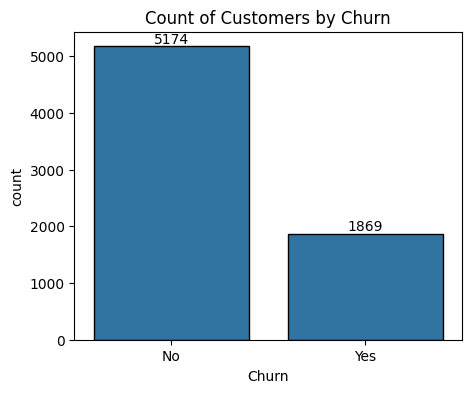

In [54]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'Churn', data=df, edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

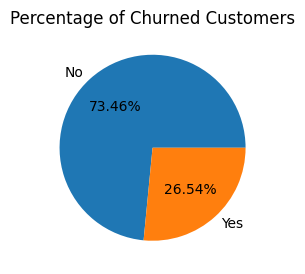

In [53]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have churned out.


#Now let's explore the reason behind it.

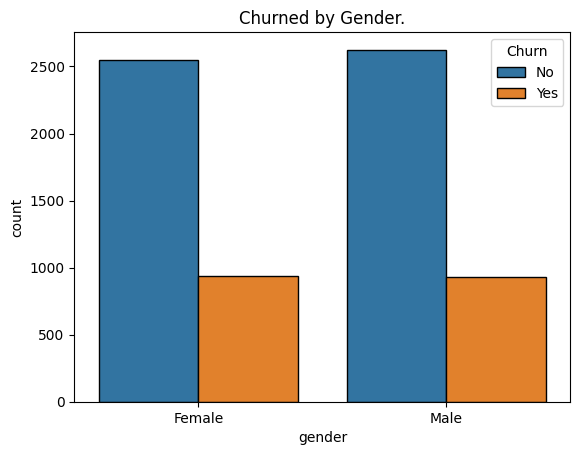

In [51]:
sns.countplot(x = "gender", data = df, hue = "Churn", edgecolor='black')
plt.title("Churned by Gender.")
plt.show()

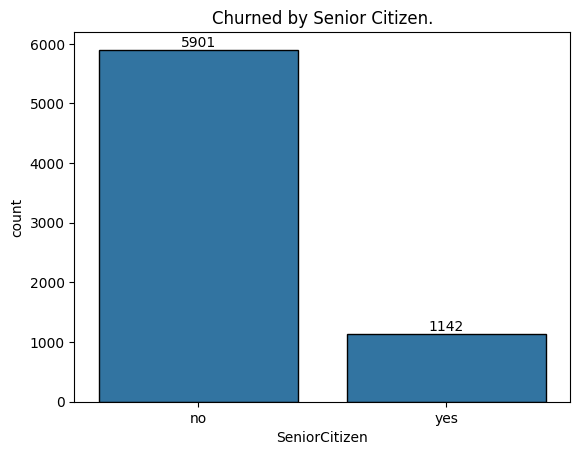

In [50]:
ax = sns.countplot(x = "SeniorCitizen", data = df, edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title("Churned by Senior Citizen.")
plt.show()

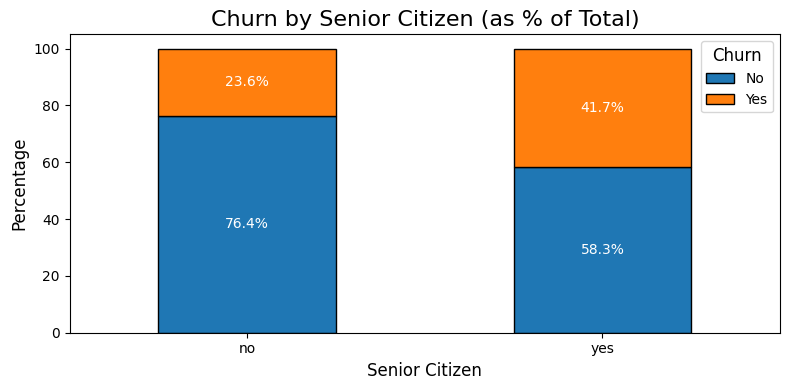

In [63]:
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
grouped['Total'] = grouped.groupby('SeniorCitizen')['Count'].transform('sum')
grouped['Percentage'] = (grouped['Count'] / grouped['Total'] * 100).round(2)

# Pivot data for visualization
pivot = grouped.pivot(index='SeniorCitizen', columns='Churn', values='Percentage').fillna(0)

# Define colors for the chart
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange (Adjust as needed)

# Plot the stacked bar chart
ax = pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    color=colors,
    edgecolor='black'
)

# Chart customization
plt.title("Churn by Senior Citizen (as % of Total)", fontsize=16)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Senior Citizen", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Churn", fontsize=10, title_fontsize=12, loc='upper right')

# Add percentage labels to the bars
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0:  # Only annotate bars with height > 0
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + bar.get_height() / 2
            percentage = f"{bar.get_height():.1f}%"
            ax.text(x, y, percentage, ha='center', va='center', fontsize=10, color='white')

# Adjust layout
plt.tight_layout()
plt.show()

#Comparative a greater percentage of people in senior citizen category have churned.

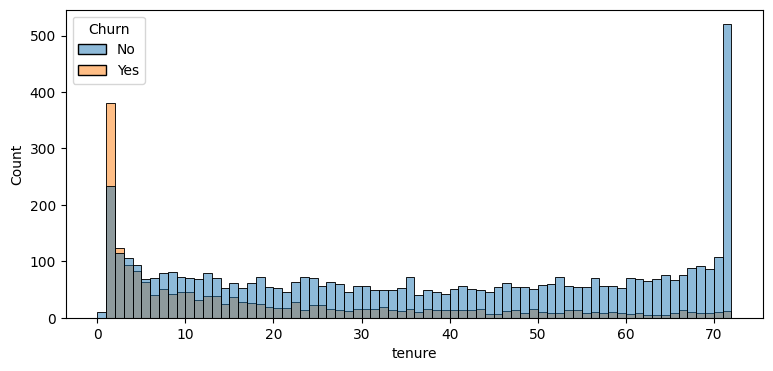

In [58]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#People who have used our services for a long time have stayed and people who have used our service for 1-2 months have churned.

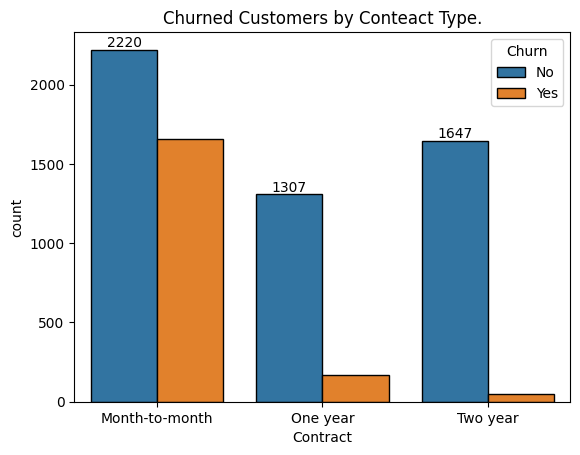

In [75]:
ax = sns.countplot(x = "Contract", data = df, edgecolor='black', hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by Conteact Type.")
plt.show()

#People who have month-month contract are likely to churn then from those who have 1 or 2 years of contract. 

In [64]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

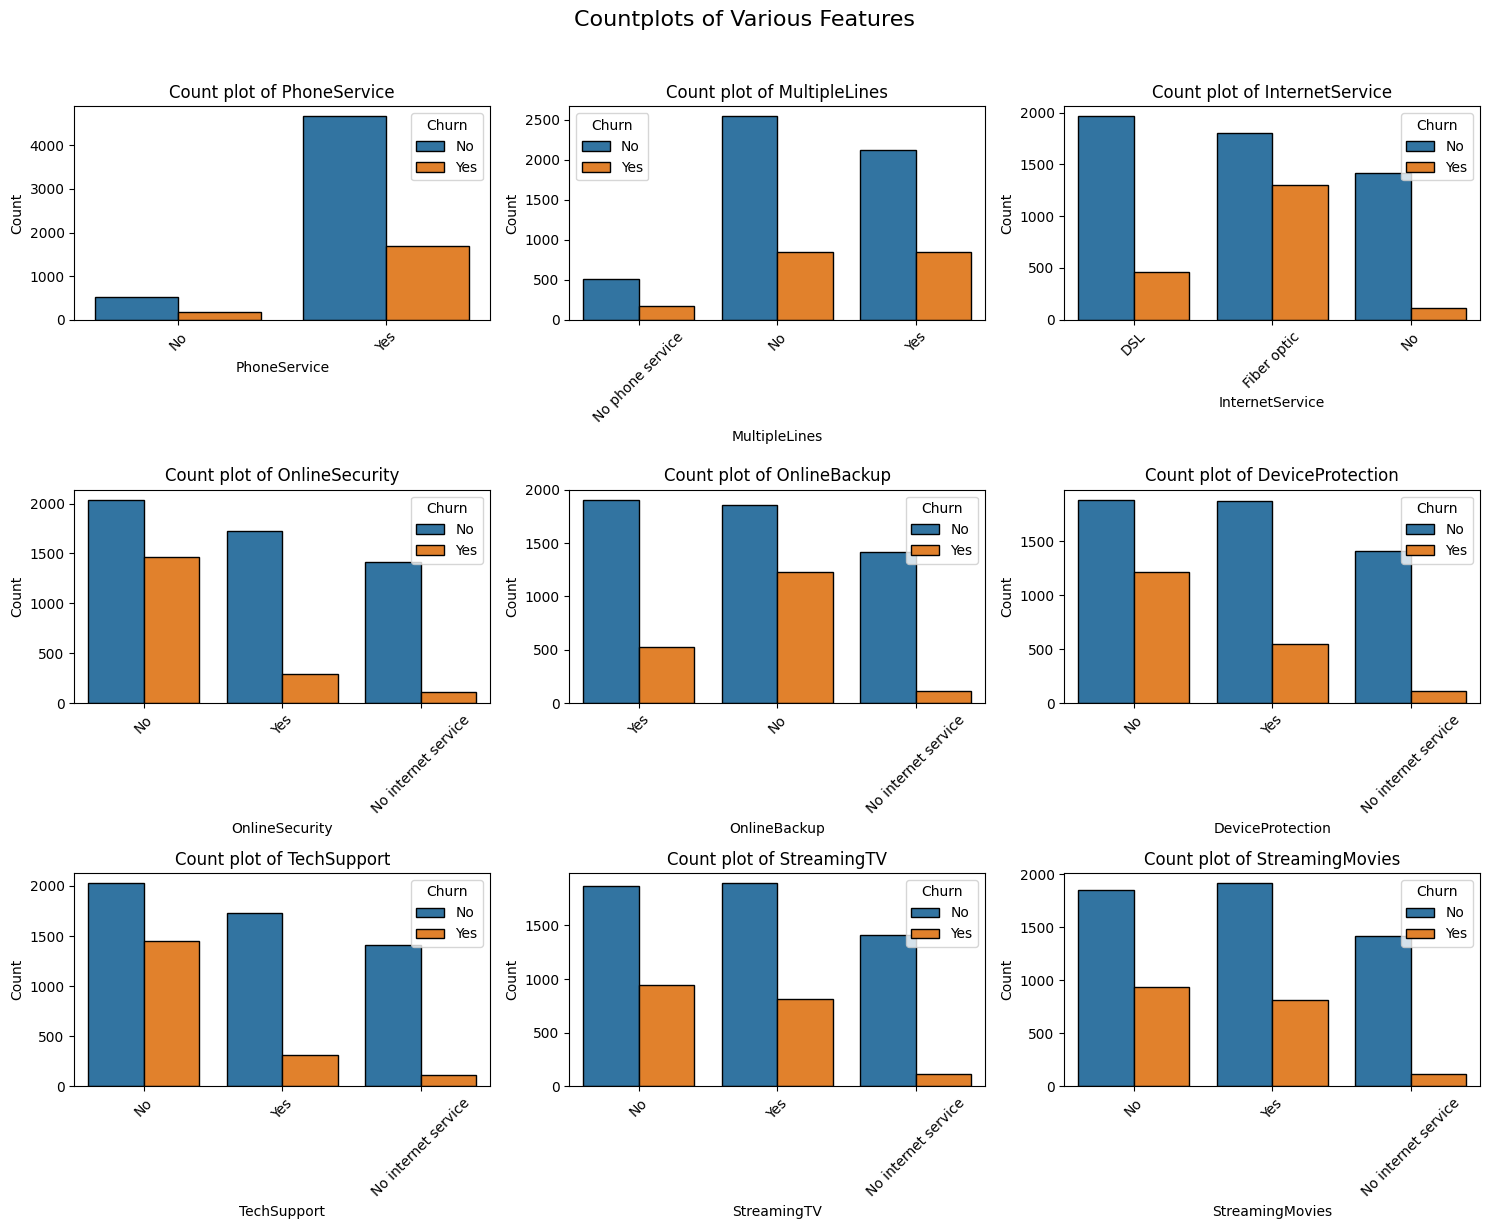

In [73]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Determine the grid size based on the number of columns
n_cols = 3  # Number of columns in the grid
n_rows = (len(columns) + n_cols-1 )// n_cols  # Calculate rows using ceiling division

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each countplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"], edgecolor='black')
    axes[i].set_title(f"Count plot of {col}")
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title
fig.suptitle("Countplots of Various Features", fontsize=16, y=1.02)

# Show the plots
plt.tight_layout()
plt.show()

#From the visualized data, the majority of customers do not churn across all features, as indicated by the larger "No" bars in most subplots. Features like "PhoneService" and "MultipleLines" show a high proportion of customers with services who have not churned. For internet-related services such as "OnlineSecurity," "TechSupport," and "DeviceProtection," a notable difference is observed, with higher churn rates in customers lacking these services.

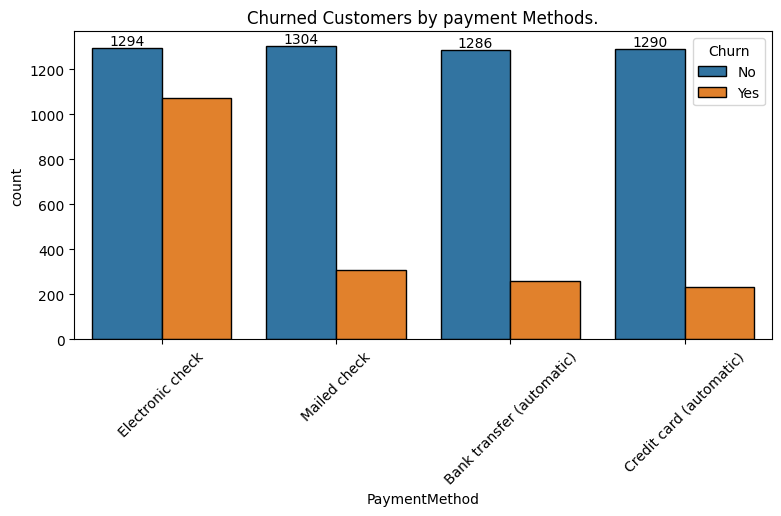

In [78]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x = "PaymentMethod", data = df, edgecolor='black', hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by payment Methods.")
plt.xticks(rotation=45)
plt.show()

#Customers are likely to churn when they are using electronic check as payment method.